---
---
## Importing necessary libraries.
---
---

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import h5py                                            # to Handle hdf5 file format
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

---
---
## Loading the latest TensorFlow and printing the version of tensorflow that we are using. 
---
---

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 2.x selected.
2.1.0-rc1


---
---
## Loading the H5 file using python package `'h5py'`.
---
---

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data = h5py.File(r'/content/drive/My Drive/Colab Notebooks/my_work/SVHN_single_grey1.h5','r+')

In [5]:
data.keys()

KeysView(<HDF5 file "SVHN_single_grey1.h5" (mode r+)>)

> - **Data is contained as Train, Test and validation set of features and label.**

In [6]:
List_of_keys = data.keys()
print(List_of_keys)

KeysView(<HDF5 file "SVHN_single_grey1.h5" (mode r+)>)


> - Storing the keys of data file into list named '`List_of_keys`'.

---
## Let's have a look for shape of all keys of our data.
---

In [7]:
#Checking the index,values and shape of the folder present in SVHN_single_grey1.h5 file 
for index, value in enumerate(data.keys()):
    value_ = np.array(data.get(value))
    print('shape of {} is --> '.format(value) , value_.shape)

shape of X_test is -->  (18000, 32, 32)
shape of X_train is -->  (42000, 32, 32)
shape of X_val is -->  (60000, 32, 32)
shape of y_test is -->  (18000,)
shape of y_train is -->  (42000,)
shape of y_val is -->  (60000,)


> - **Training feature set(X_train) is having 42000 images with pixel size 32*32.**
> - **Training target set(y_train) is having 42000  labels to images.**
---
> - **Testing feature set(X_test) is having 18000 images with pixel size 32*32.**
> - **Testing target set(y_test) is having 18000  labels to images.**
---
> - **Validation feature set(X_val) is having 60000 images with pixel size 32*32.**
> - **Validation target set(y_val) is having 18000  labels to images.**

---
## We can load data into local variable.
---

In [0]:
X_test = np.array(data.get('X_test')) 
X_train = np.array(data.get('X_train'))
X_val = np.array(data.get('X_val')) 
y_test = np.array(data.get('y_test')) 
y_train = np.array(data.get('y_train')) 
y_val = np.array(data.get('y_val'))

In [9]:
X_train[0]

array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

> - This is the first image in training set with pixel size 32*32.
> - Like these we have images in X_test and X_val.

In [10]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

> - With above result we can clarify that there are 10 classes of images that we need to classify.

### We can also view the images which are loaded as pixel in above local variables.
>- Ploting first 10 images in the traing(X_train) set and their labels(y_train).

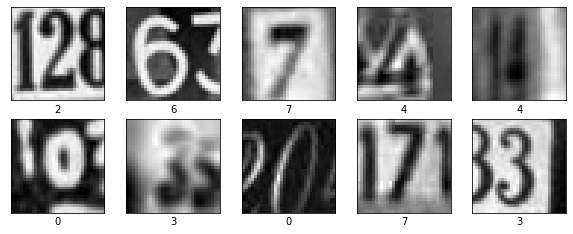

In [11]:
plt.figure(figsize=(10,10))                                                     # figure size 
for i in range(10):                                                             # looping for first 10 element of training set
    plt.subplot(5,5,i+1)                                                        # creating sub plot for  ploting figure 
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)                                  # Ploting binry figures 
    plt.xlabel(y_train[i])                                                      # giving Lables to plot images 
plt.show()

>- Ploting first 10 images in the Test (X_test) set and their labels(y_test).

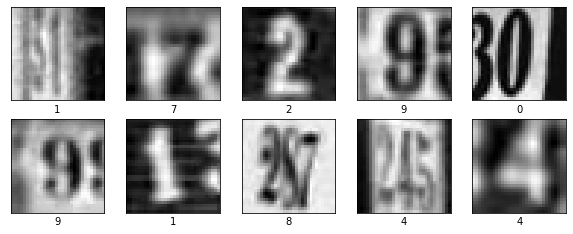

In [12]:
plt.figure(figsize=(10,10))                                                     # figure size 
for i in range(10):                                                             # looping for first 10 element of training set
    plt.subplot(5,5,i+1)                                                        # creating sub plot for  ploting figure 
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)                                   # Ploting binry figures 
    plt.xlabel(y_test[i])                                                       # giving Lables to plot images 
plt.show()

>- Ploting first 10 images in the Validation (X_val) set and their labels(y_val).

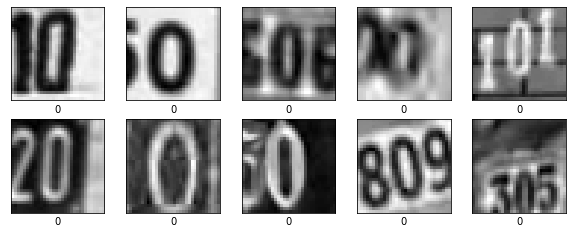

In [13]:
plt.figure(figsize=(10,10))                                                     # figure size 
for i in range(10):                                                             # looping for first 10 element of training set
    plt.subplot(5,5,i+1)                                                        # creating sub plot for  ploting figure 
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_val[i], cmap=plt.cm.binary)                                    # Ploting binry figures 
    plt.xlabel(y_val[i])                                                        # giving Lables to plot images 
plt.show()

> - **As stated in the problem statment that we have to identify the image centered digit.**

### Scaling input feature (i.e. Images) our data for building neural network model
(Normalizing of Pixels)

In [14]:
# confirm pixel range is 0-255

print('Data Type: %s' % X_train.dtype)
print('Data Type: %s' % X_test.dtype)
print('Data Type: %s' % X_val.dtype)
print('Min: %.3f, Max: %.3f' % (X_train.min(), X_train.max()))
print('Min: %.3f, Max: %.3f' % (X_test.min(), X_test.max()))
print('Min: %.3f, Max: %.3f' % (X_val.min(), X_val.max()))

Data Type: float32
Data Type: float32
Data Type: float32
Min: 0.000, Max: 254.975
Min: 0.000, Max: 254.975
Min: 0.000, Max: 254.975


In [15]:
# normalize to the range 0-1

ScacledX_train = X_train/255
ScacledX_test = X_test/255
ScacledX_val = X_val/255

# confirm the normalization

print('Min: %.3f, Max: %.3f' % (ScacledX_train.min(), ScacledX_train.max()))
print('Min: %.3f, Max: %.3f' % (ScacledX_test.min(), ScacledX_test.max()))
print('Min: %.3f, Max: %.3f' % (ScacledX_val.min(), ScacledX_val.max()))

Min: 0.000, Max: 1.000
Min: 0.000, Max: 1.000
Min: 0.000, Max: 1.000


### Performing One hot encoding on label dataset.

In [16]:
y_train.shape,y_test.shape,y_val.shape

((42000,), (18000,), (60000,))

In [0]:
trainy = tf.keras.utils.to_categorical(y_train)
testy = tf.keras.utils.to_categorical(y_test)
valy = tf.keras.utils.to_categorical(y_val)

In [18]:
trainy.shape,testy.shape,valy.shape

((42000, 10), (18000, 10), (60000, 10))

## Let's import necessary libraries for neural network.

In [0]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Reshape
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.metrics import Accuracy

In [0]:
tf.keras.backend.clear_session()                                                # Clear out tensorflow memory

In [0]:
# Initialize Sequential model
model = Sequential()                                                            # Instantiating keras sequential models from keras

In [0]:
# First layer (input layer) of  32*32 = 1024 after flattening the image of 32*32 picxels
model.add(Reshape((1024,),input_shape=(32,32,)))

#normalizing 
model.add(BatchNormalization())

#first Hidden layer
model.add(Dense(256,activation='relu'))

#second Hidden layer
model.add(Dense(128,activation='relu'))

#normalizing 
model.add(BatchNormalization())

#third Hidden layer
model.add(Dense(16,activation='relu'))

#Normalization
model.add(BatchNormalization())

# Final layer with activation function as softmax and 10 neurons 
model.add(Dense(10, activation='softmax'))

In [0]:
# Create optimizer with non-default learning rate
sgd_optimizer = SGD(lr=0.03)

# Compile the model
model.compile('sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                2064      
_________________________________________________________________
batch_normalization_2 (Batch (None, 16)                6

In [0]:
#Initialize model, reshape & normalize data
model2 = Sequential()

In [0]:
#Reshape data from 2D (32,32) to 3D (32, 32, 1)
model2.add(Reshape((32,32,1),input_shape=(32,32,)))

#normalize data
model2.add(BatchNormalization())

#Add first convolutional layer
model2.add(Conv2D(32,                                                           # Number of filters 
                  kernel_size=(5,5),                                            # Size of the filter
                  activation='relu'))                                           # Size = 32-5+1 = 30

#Add second convolutional layer
model2.add(Conv2D(32, kernel_size=(5,5), activation='relu'))                    #Size of image = 24

#Flatten the output
model2.add(Flatten())

#Dense layer
model2.add(Dense(128, activation='relu'))

#Output layer
model2.add(Dense(10, activation='softmax'))

In [0]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 32, 32, 1)         0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        25632     
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               2359424   
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

### Training Neural Network Model

In [39]:
#Train the model
history = model.fit(ScacledX_train,trainy,          
                    validation_data=(ScacledX_val,valy),
                    epochs=10,
                    batch_size=32)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 13s 309us/sample - loss: 1.8684 - accuracy: 0.3628 - val_loss: 1.3666 - val_accuracy: 0.5714
Epoch 2/10
42000/42000 [==============================] - 12s 288us/sample - loss: 1.2719 - accuracy: 0.5961 - val_loss: 0.9940 - val_accuracy: 0.6937
Epoch 3/10
42000/42000 [==============================] - 12s 293us/sample - loss: 1.0576 - accuracy: 0.6646 - val_loss: 0.8211 - val_accuracy: 0.7492
Epoch 4/10
42000/42000 [==============================] - 12s 288us/sample - loss: 0.9479 - accuracy: 0.6990 - val_loss: 0.7544 - val_accuracy: 0.7696
Epoch 5/10
42000/42000 [==============================] - 12s 286us/sample - loss: 0.8734 - accuracy: 0.7249 - val_loss: 0.7857 - val_accuracy: 0.7583
Epoch 6/10
42000/42000 [==============================] - 12s 289us/sample - loss: 0.8210 - accuracy: 0.7415 - val_loss: 0.6468 - val_accuracy: 0.8041
Epoch 7/10
42000/42000 [====================

### Training the model2(Convolutional Neural Network Model)

In [40]:
history2 = model2.fit(ScacledX_train,trainy,          
                      validation_data=(ScacledX_val,valy),
                      epochs=10,
                      batch_size=32)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 238s 6ms/sample - loss: 0.6413 - accuracy: 0.8026 - val_loss: 0.3839 - val_accuracy: 0.8877
Epoch 2/10
42000/42000 [==============================] - 237s 6ms/sample - loss: 0.3600 - accuracy: 0.8931 - val_loss: 0.2980 - val_accuracy: 0.9109
Epoch 3/10
42000/42000 [==============================] - 237s 6ms/sample - loss: 0.2616 - accuracy: 0.9207 - val_loss: 0.2385 - val_accuracy: 0.9319
Epoch 4/10
42000/42000 [==============================] - 238s 6ms/sample - loss: 0.1923 - accuracy: 0.9403 - val_loss: 0.2137 - val_accuracy: 0.9418
Epoch 5/10
42000/42000 [==============================] - 238s 6ms/sample - loss: 0.1451 - accuracy: 0.9544 - val_loss: 0.2107 - val_accuracy: 0.9470
Epoch 6/10
42000/42000 [==============================] - 237s 6ms/sample - loss: 0.1123 - accuracy: 0.9636 - val_loss: 0.2048 - val_accuracy: 0.9524
Epoch 7/10
42000/42000 [==========================

### Visualization for accuracy for train and validation set for neural network model

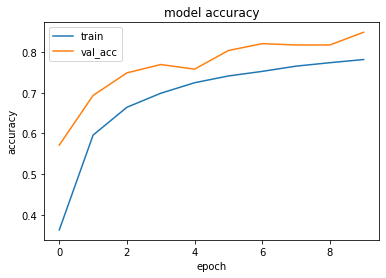

In [41]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val_acc'], loc='upper left')
plt.show()

> - Accuracy is gradually increasing for both training and validation set.

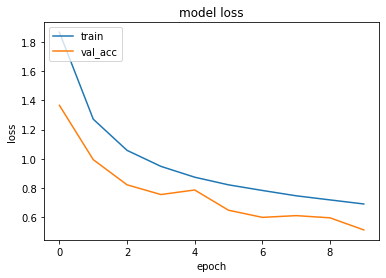

In [42]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_acc'], loc='upper left')
plt.show()

> - Loss is gradually decreasing for both train and validation set.

### Visualization for accuracy for train and validation set for convolutional  neural network model(i.e. model2)

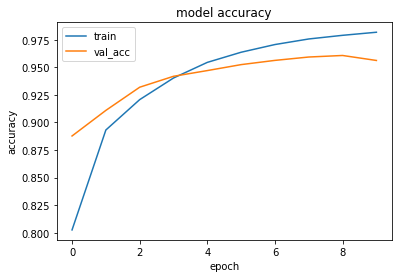

In [43]:
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val_acc'], loc='upper left')
plt.show()

> - Accuracy is gradually increasing for both training and validation set till epoch3 then validition accuracy is increased than that of training set.

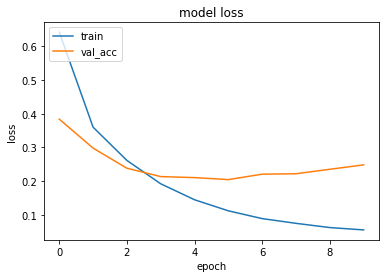

In [44]:
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_acc'], loc='upper left')
plt.show()

> - Loss is gradually decreasing for both train and validation set and then at epoch3 loss is decreased for validation set than that of training set.

In [51]:
# printing the confusion matrix 
from sklearn.metrics import classification_report,confusion_matrix
test_1 = tf.cast(ScacledX_test, tf.float32)
print(confusion_matrix(model.predict_classes(test_1), y_test))
print ('\n Model2 Confusion Matrix (Convolutional Neural Network Model) \n ')
print(confusion_matrix(model2.predict_classes(test_1), y_test))

[[1594   28   29   28   26   22   59   24   41   75]
 [  42 1588   44   65   67   31   35   65   59   45]
 [  13   19 1442   36   20   12   16   33   18   24]
 [  19   24   31 1271   20   92   21   14   45   42]
 [  18   47   26   22 1551   15   47   15   24   28]
 [   6   10   17  127   14 1422   52   11   45   41]
 [  30   14   10   15   42   70 1482   11   88   14]
 [  31   54  112   50   13   16   13 1598   14   34]
 [  20   30   36   64   19   53   82   15 1416   56]
 [  41   14   56   41   40   35   25   22   62 1445]]

 Model2 Confusion Matrix (Convolutional Neural Network Model) 
 
[[1667   29   24   15    7    5   26   15   19   44]
 [  22 1582   18   13   20    8    9   36   18   13]
 [   4   13 1579    9   19    6    6   26    6   10]
 [  10   31   27 1484   13   63   14   29   36   18]
 [   5   53   20   12 1626    7   14   17   19   18]
 [   3   13   13   88    8 1575   43   12   23   34]
 [  49   27    7   37   55   64 1655   18  102   26]
 [   6   36   37   11    9    2 

In [52]:
# printing Classification report for model
print("Classification report for Neural Network model: \n")
print(classification_report(model.predict_classes(test_1),y_test))

Classification report for Neural Network model: 

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1926
           1       0.87      0.78      0.82      2041
           2       0.80      0.88      0.84      1633
           3       0.74      0.80      0.77      1579
           4       0.86      0.87      0.86      1793
           5       0.80      0.81      0.81      1745
           6       0.81      0.83      0.82      1776
           7       0.88      0.83      0.85      1935
           8       0.78      0.79      0.79      1791
           9       0.80      0.81      0.81      1781

    accuracy                           0.82     18000
   macro avg       0.82      0.82      0.82     18000
weighted avg       0.83      0.82      0.82     18000



In [50]:
# printing Classification report for model2
print("Classification report Convolutional Neural Network Model: \n")
print(classification_report(model2.predict_classes(test_1),y_test))

Classification report Convolutional Neural Network Model: 

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1851
           1       0.87      0.91      0.89      1739
           2       0.88      0.94      0.91      1678
           3       0.86      0.86      0.86      1725
           4       0.90      0.91      0.90      1791
           5       0.89      0.87      0.88      1812
           6       0.90      0.81      0.85      2040
           7       0.90      0.93      0.92      1751
           8       0.86      0.86      0.86      1810
           9       0.88      0.89      0.88      1803

    accuracy                           0.89     18000
   macro avg       0.89      0.89      0.89     18000
weighted avg       0.89      0.89      0.89     18000



# **From the above graph and classification report we can conclude that Convolutional Neural Network seems to be performing better on dataset where we need to classify images because it consider the neighbour pixel properties.**